## Usando Duckdb

                                                path        name   size  \
0  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201001.csv  20859   
1  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201002.csv  19108   
2  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201003.csv  24489   
3  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201004.csv  11322   
4  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201005.csv  14111   

   modificationTime  
0      1.722380e+09  
1      1.722380e+09  
2      1.722380e+09  
3      1.722380e+09  
4      1.722380e+09  
DataFrame Dask computado:
                                                path        name   size  \
0  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201001.csv  20859   
1  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201002.csv  19108   
2  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201003.csv  24489   
3  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201004.csv  11322   
4  C:\Users\kari

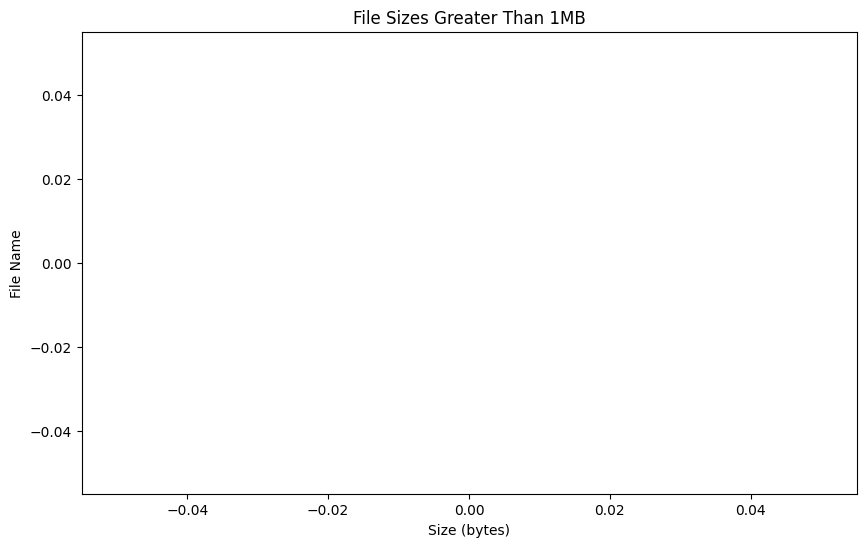

DataFrame pandas com detalhes dos arquivos:
                                                 path        name   size  \
0   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201001.csv  20859   
1   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201002.csv  19108   
2   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201003.csv  24489   
3   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201004.csv  11322   
4   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201005.csv  14111   
..                                                ...         ...    ...   
86  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201703.csv  62192   
87  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201704.csv  24355   
88  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201705.csv  19923   
89  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201706.csv  22141   
90  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201707.csv  24020   

    modificationTime  
0       1.722380e+09

In [1]:
import os
import pandas as pd
import dask.dataframe as dd
import duckdb
import matplotlib.pyplot as plt

# Diretório a ser listado (usando string bruta para evitar problemas com caracteres de escape)
directory = r'C:\Users\karin\OneDrive\Área de Trabalho\data science\15. Ferramentas de visualização-20240730T225634Z-001\15. Ferramentas de visualização\Base de dados\CSV'

# Listar arquivos no diretório e coletar detalhes
file_details = []

# Usando os.walk para listar arquivos no diretório
for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_info = {
            'path': file_path,
            'name': file,
            'size': os.path.getsize(file_path),
            'modificationTime': os.path.getmtime(file_path)
        }
        file_details.append(file_info)

# Verificar se foram encontrados arquivos
if not file_details:
    print("Nenhum arquivo encontrado no diretório especificado.")
else:
    # Criar um DataFrame pandas com os detalhes dos arquivos
    df_pandas = pd.DataFrame(file_details)

    # Verificar se o DataFrame pandas está preenchido
    if df_pandas.empty:
        print("DataFrame pandas está vazio.")
    else:
        # Exibir o DataFrame pandas
        print("DataFrame pandas com detalhes dos arquivos:")
        print(df_pandas)

        # Converter para Dask DataFrame
        df_dask = dd.from_pandas(df_pandas, npartitions=3)

        # Exibir as primeiras linhas do DataFrame Dask
        print("DataFrame Dask com detalhes dos arquivos:")
        df_head = df_dask.head()
        print(df_head)

        # Computar explicitamente o DataFrame Dask para outras operações
        df_computed = df_dask.compute()
        print("DataFrame Dask computado:")
        print(df_computed.head())

        # Usar DuckDB para consulta e análise
        con = duckdb.connect(database=':memory:')

        # Registrar DataFrame pandas no DuckDB
        con.register('file_details', df_pandas)

        # Exemplo de consulta: Obter arquivos com tamanho maior que 1MB
        result = con.execute("SELECT * FROM file_details WHERE size > 1 * 1024 * 1024").fetchdf()
        print("Arquivos maiores que 1MB:")
        print(result)

        # Exemplo de visualização: Tamanho dos arquivos
        plt.figure(figsize=(10, 6))
        plt.barh(result['name'], result['size'])
        plt.xlabel('Size (bytes)')
        plt.ylabel('File Name')
        plt.title('File Sizes Greater Than 1MB')
        plt.show()


## Mais exemplos de uso de DuckDB

## Carregar Dados e Configurar DuckDB

In [2]:
import os
import pandas as pd
import dask.dataframe as dd
import duckdb

# Diretório a ser listado (usando string bruta para evitar problemas com caracteres de escape)
directory = r'C:\Users\karin\OneDrive\Área de Trabalho\data science\15. Ferramentas de visualização-20240730T225634Z-001\15. Ferramentas de visualização\Base de dados\CSV'

# Listar arquivos no diretório e coletar detalhes
file_details = []
for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_info = {
            'path': file_path,
            'name': file,
            'size': os.path.getsize(file_path),
            'modificationTime': os.path.getmtime(file_path)
        }
        file_details.append(file_info)

df_pandas = pd.DataFrame(file_details)

# Conectar ao DuckDB e registrar o DataFrame pandas
con = duckdb.connect(database=':memory:')
con.register('file_details', df_pandas)

# Verificar o DataFrame
df_pandas.head()


,path,name,size,modificationTime
0,C:\Users\karin\OneDrive\Área de Trabalho\data ...,201001.csv,20859,1.722380e+09
1,C:\Users\karin\OneDrive\Área de Trabalho\data ...,201002.csv,19108,1.722380e+09
2,C:\Users\karin\OneDrive\Área de Trabalho\data ...,201003.csv,24489,1.722380e+09
3,C:\Users\karin\OneDrive\Área de Trabalho\data ...,201004.csv,11322,1.722380e+09
4,C:\Users\karin\OneDrive\Área de Trabalho\data ...,201005.csv,14111,1.722380e+09


## Consultas SQL com DuckDB
Arquivos maiores que 10KB:

In [3]:
query1 = """
SELECT * FROM file_details WHERE size > 10 * 1024
"""
result1 = con.execute(query1).fetchdf()
print(result1)


                                                 path        name   size  \
0   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201001.csv  20859   
1   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201002.csv  19108   
2   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201003.csv  24489   
3   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201004.csv  11322   
4   C:\Users\karin\OneDrive\Área de Trabalho\data ...  201005.csv  14111   
..                                                ...         ...    ...   
85  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201703.csv  62192   
86  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201704.csv  24355   
87  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201705.csv  19923   
88  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201706.csv  22141   
89  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201707.csv  24020   

    modificationTime  
0       1.722380e+09  
1       1.722380e+09  
2       1.722380e+

## Quantidade de arquivos por tamanho (intervalos de 10KB):

In [4]:
query2 = """
SELECT 
    FLOOR(size / 10240) * 10 AS size_range_kb, 
    COUNT(*) AS count 
FROM 
    file_details 
GROUP BY 
    size_range_kb 
ORDER BY 
    size_range_kb
"""
result2 = con.execute(query2).fetchdf()
print(result2)


   size_range_kb  count
0            0.0      1
1           10.0     33
2           20.0     31
3           30.0     16
4           40.0      7
5           50.0      2
6           60.0      1


## Média de tamanho dos arquivos:

In [5]:
query3 = """
SELECT AVG(size) AS average_size FROM file_details
"""
result3 = con.execute(query3).fetchdf()
print(result3)


   average_size
0  25337.835165


## Arquivos mais recentes:

In [6]:
query4 = """
SELECT * FROM file_details ORDER BY modificationTime DESC LIMIT 10
"""
result4 = con.execute(query4).fetchdf()
print(result4)


                                                path        name   size  \
0  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201311.csv  24369   
1  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201310.csv  40801   
2  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201402.csv  27013   
3  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201105.csv  21204   
4  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201111.csv  12475   
5  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201205.csv  17461   
6  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201403.csv  52237   
7  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201309.csv  43519   
8  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201103.csv  43230   
9  C:\Users\karin\OneDrive\Área de Trabalho\data ...  201401.csv  31523   

   modificationTime  
0      1.722380e+09  
1      1.722380e+09  
2      1.722380e+09  
3      1.722380e+09  
4      1.722380e+09  
5      1.722380e+09  
6      1.722380e+09 

## Soma do tamanho dos arquivos:

In [7]:
query5 = """
SELECT SUM(size) AS total_size FROM file_details
"""
result5 = con.execute(query5).fetchdf()
print(result5)


   total_size
0   2305743.0


## Visualização dos Resultados

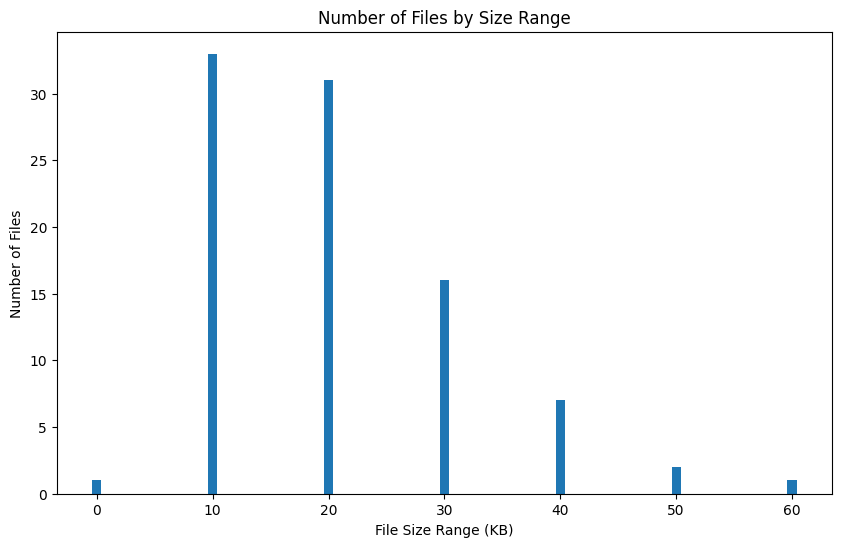

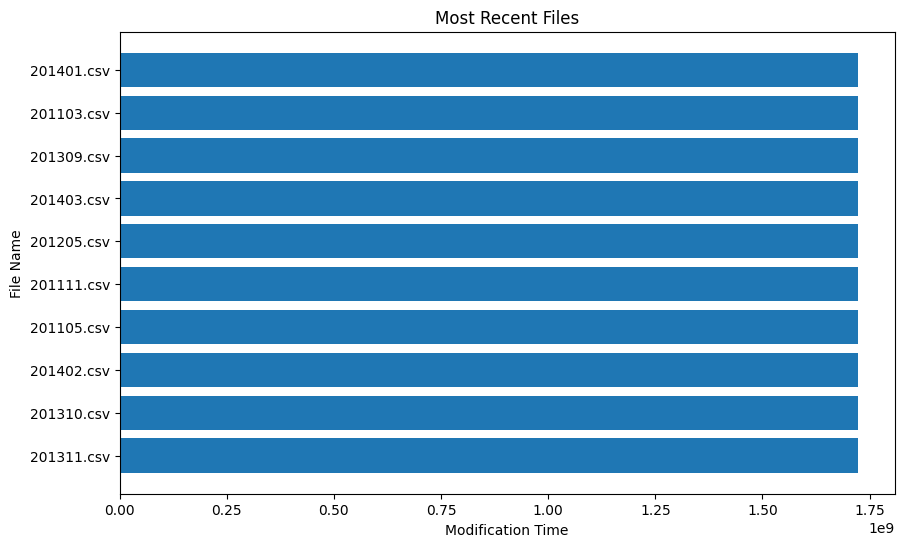

In [8]:
import matplotlib.pyplot as plt

# Visualizar a quantidade de arquivos por tamanho (intervalos de 10KB)
plt.figure(figsize=(10, 6))
plt.bar(result2['size_range_kb'], result2['count'])
plt.xlabel('File Size Range (KB)')
plt.ylabel('Number of Files')
plt.title('Number of Files by Size Range')
plt.show()

# Visualizar os arquivos mais recentes
plt.figure(figsize=(10, 6))
plt.barh(result4['name'], result4['modificationTime'])
plt.xlabel('Modification Time')
plt.ylabel('File Name')
plt.title('Most Recent Files')
plt.show()
